In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np 
from numba import jit
from numpy import sin, pi
from pathlib import Path

%reload_ext autoreload
%aimport visualization
%aimport species_transport
%aimport parameters
from parameters import *
from fluid_flow import dt_fluid_flow
from visualization import plot_species_overview, plot_velocity_vector_field
from species_transport import evolve_species

In [2]:
NN = np.array([30, 50, 70, 100, 140])

# stability thresholds for dt_chem (found by hand for the different N):
thr = np.array([0.2, 0.6, 1.1, 1.75, 2.65]) * 2.2857e-7
Dt = np.zeros_like(thr)
for i, N in enumerate(NN):
    dx, dy, Ns_c, Nc_lw = parameters.set_resolution(N,N)
    dt = dt_fluid_flow(dx, Fo=0.3 * 0.9)
    Dt[i] = dt

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
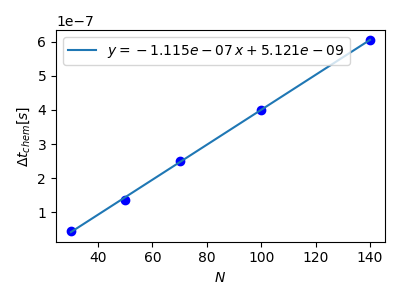

In [3]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(NN, thr, 'bo')
ax.set_xlabel('$N$')
ax.set_ylabel('$\Delta t_{chem} [s]$')


# lin. fit
from scipy.optimize import curve_fit
def lin(x, a, b): return a*x + b 
popt, pcov = curve_fit(lin, NN, thr)
a,b = popt
yopt = lin(NN, *popt)
s = '$y = {:.4g} \, x + {:.4g}$'.format(b,a)
ax.plot(NN, yopt, label=s)
ax.legend()

plt.tight_layout()

**Note** The above linear stability threshold does not hold for $N\ge 160$ anymore. It is probably due to the fact that `dt_chem` needs to be appreciably smaller than `dt` (in fact, it turns out that `dt_chem`$\lesssim$`dt`/6, i.e. one must have at least ~6 chemistry iterations per simulation step.